In [5]:
# implement move generation functions
# currently in move_generation.py, needs to be updated if bitboard_implementation gets updated
# made using jupyter nbconvert --to script your_notebook.ipynb

import move_generation as mg
import random

In [6]:
# the starting game state, the convention in this engine is that the first 6 bitboards represent white, represented by 0
# white
white_pawn = int('0000000011111111000000000000000000000000000000000000000000000000', 2)
white_rook = int('1000000100000000000000000000000000000000000000000000000000000000', 2)
white_knight = int('0100001000000000000000000000000000000000000000000000000000000000', 2)
white_bishop = int('0010010000000000000000000000000000000000000000000000000000000000', 2)
white_queen = int('0000100000000000000000000000000000000000000000000000000000000000', 2)
white_king = int('0001000000000000000000000000000000000000000000000000000000000000', 2)

# black
black_pawn = int('0000000000000000000000000000000000000000000000001111111100000000', 2)
black_rook = int('0000000000000000000000000000000000000000000000000000000010000001', 2)
black_knight = int('0000000000000000000000000000000000000000000000000000000001000010', 2)
black_bishop = int('0000000000000000000000000000000000000000000000000000000000100100', 2)
black_queen = int('0000000000000000000000000000000000000000000000000000000000001000', 2)
black_king = int('0000000000000000000000000000000000000000000000000000000000010000', 2)

# en passant
white_en_passant = 0
black_en_passant = 0

# castling_rights
white_long_castle = True
white_short_castle = True
black_long_castle = True
black_short_castle = True

initial_game_state = [white_pawn, white_rook, white_knight, white_bishop, white_queen, white_king, black_pawn, black_rook, black_knight, black_bishop, black_queen, black_king, white_en_passant, black_en_passant, white_long_castle, white_short_castle, black_long_castle, black_short_castle]

In [7]:
color = 0
# generate pseudo-legal moves
plms = mg.move_generator(initial_game_state, color)

# turn pseudo-legal moves into legal moves
lms = mg.pseudo_to_legal(plms, initial_game_state, color)

# visualize
#for s in lms:
    #mg.print_board(s)

In [8]:
def move_generator(game_state, color):
    plms = mg.move_generator(game_state, color)
    return mg.pseudo_to_legal(plms, game_state, color)

def change_player(x):
    return 1 if x == 0 else 0

### Classical Monte Carlo Tree Search

https://www.youtube.com/watch?v=UXW2yZndl7U&t=771s

apply a value to each node using the upper confidence bound one applied to trees (UCT).

UCT for a state $S_i$: 
$UCT(S_i) = w_i/n_i + c*sqrt(ln(N_i)/n_i$

with $w_i$: the amount of wins
$n_i$: the amount of visits
$c$: exploration parameter
$N_i$: the amount of visists of the parent node

$w_i/n_i$ is the exploitation part

$c*sqrt(ln(N_i)/n_i$ is the exploration part

punish many iterations through the same nodes to encourage a more diverse exploration of the underlying nodes of a given state


1. calculate all possible moves from the current state
2. UCT will be infinite for all possible moves since none will have been visited yet
3. so we'll have to do a rollout for each leaf node (every possible move is a leaf node)
    - a rollout consists of doing random actions starting from the leaf node to a terminal state
    - a terminal state has a value (win or lose in chess)
3. add terminal value to the value of the initial leaf node (which had value 0 to start) and the initial state (also had value 0 to start)
4. recalculate UCT for all leaf nodes 

In [9]:
color = 0
# generate pseudo-legal moves
plms = mg.move_generator(initial_game_state, color)

# turn pseudo-legal moves into legal moves
lms = mg.pseudo_to_legal(plms, initial_game_state, color)


In [ ]:
We have to make a much better evaluation function

In [ ]:
start by counting piece value

In [10]:
#evaluation needs to happen with the right color, the original color, can be achieved by only searching for an even depth

def dfs(state, depth, color):
    # Base case: if we've reached the maximum depth or terminal position, return evaluation.
    if depth == 0:
        return evaluate_state(state, color), state
    
    best_value = -float('inf')
    
    # Iterate over all legal moves from the current position.
    moves = move_generator(state, color)
    best_move = 0
    for move in moves:
               
        # Recursively evaluate the new position (using a negamax approach for simplicity)
        value, old_move = dfs(move, depth - 1, change_player(color))
        
        if value > best_value:
            best_value = value
            best_move = move
    
    return best_value, best_move

In [11]:
def evaluate_state(state):
    """
    state: gamestate to evaluate
    """
    
    white_value = mg.count_set_bits(state[0]) +  mg.count_set_bits(state[1])*5 +  mg.count_set_bits(state[2])*3 +  mg.count_set_bits(state[3])*3 +  mg.count_set_bits(state[4])*9
    black_value = mg.count_set_bits(state[6]) +  mg.count_set_bits(state[7])*5 +  mg.count_set_bits(state[8])*3 +  mg.count_set_bits(state[9])*3 +  mg.count_set_bits(state[10])*9
    
    return white_value - black_value


In [ ]:
we need minimax and alpha beta pruning

In [12]:
# white (0) is the maximizing player

def minimax(state, depth, alpha, beta, color):
    """Minimax algorithm with Alpha-Beta Pruning."""
    
    if depth == 0:                               ################### or checkmate
        return evaluate_state(state)
    
    moves = move_generator(state, color)
    
    if color == 0:
        max_value = float('-inf')
        for move in moves:
            value = minimax(move, depth - 1, alpha, beta, change_player(color))
            max_value = max(max_value, value)
            alpha = max(alpha, value)
            if beta <= alpha:
                break  # Beta cutoff
        return max_value
    else:
        min_value = float('inf')
        for move in moves:
            value = minimax(move, depth - 1, alpha, beta, change_player(color))
            min_value = min(min_value, value)
            beta = min(beta, value)
            if beta <= alpha:
                break  # Alpha cutoff
        return min_value

0


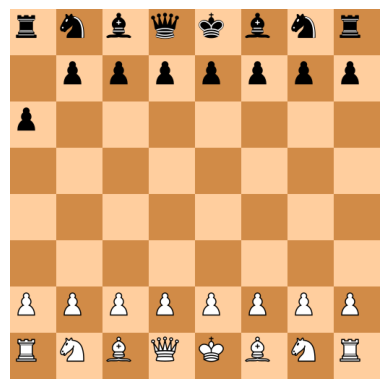

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
best_value: 0


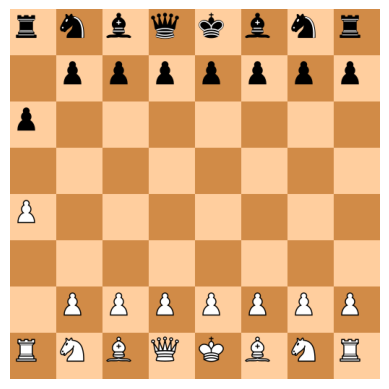

0


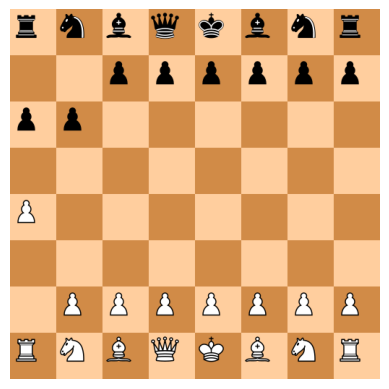

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
best_value: 0


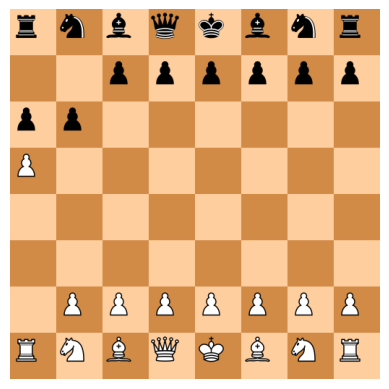

0


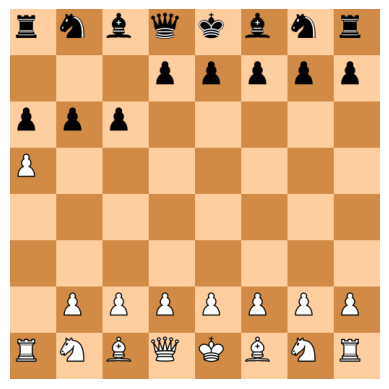

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
best_value: 1


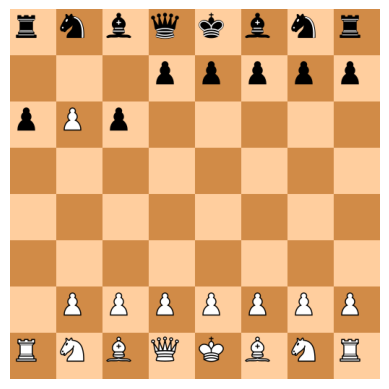

-1


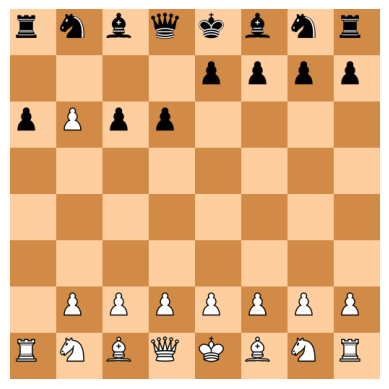

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
best_value: 1


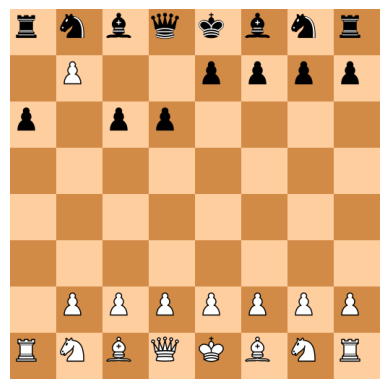

0


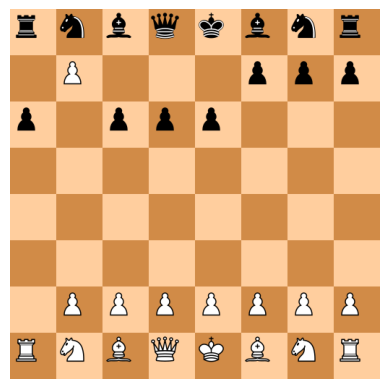

17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
best_value: 17


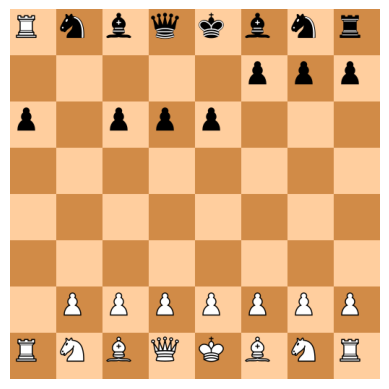

9


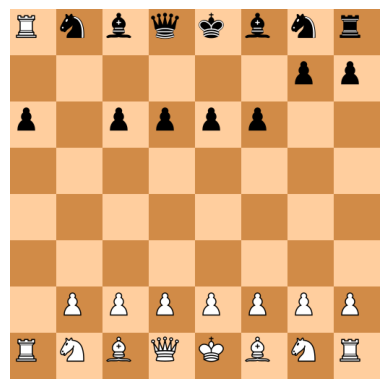

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
best_value: 16


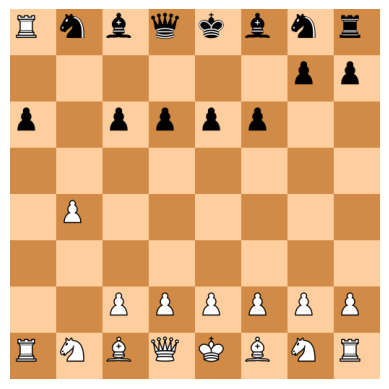

9


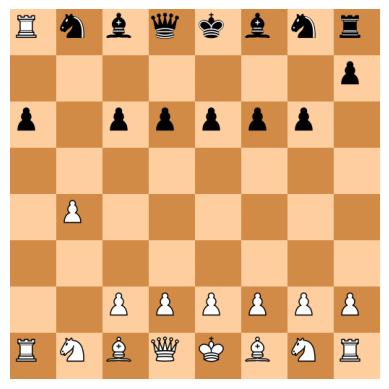

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
best_value: 16


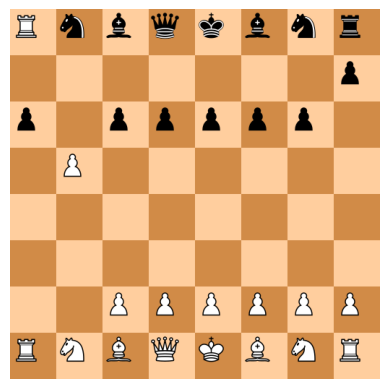

9


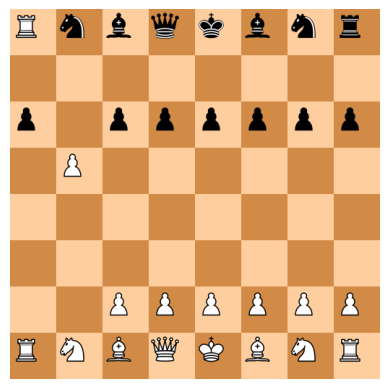

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


KeyboardInterrupt: 

In [18]:
# wth, black doesn't do shit
# it always picks the first move because they all have the same score
# but why??

state = initial_game_state
outcomes = []
for i in range(10):
    go = 0
    state = initial_game_state
    while go == 0:
        moves = move_generator(state, 1)
        best_value = float('-inf')
        best_move = None
        for move in moves:
            value = minimax(state, 3, float('-inf'), float('inf'), 1)
            
            if value > best_value:
                best_value = value
                best_move = move
                
        state = best_move
        print(best_value)
        mg.print_board(state)

        moves = move_generator(state, 0)
        best_value = float('inf')
        best_move = None
        for move in moves:
            value = minimax(state, 3, float('-inf'), float('inf'), 0)
            print(value)
            
            if value < best_value:
                best_value = value
                best_move = move
                
        state = best_move
        print("best_value: " + str(best_value))
        mg.print_board(state)

    outcomes.append(go)
    
    